<a href="https://colab.research.google.com/github/JacekPardyak/resume/blob/master/man/figures/colab/resume_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

In [9]:
# install texlive with xetex engine
!sudo apt-get update -y > /dev/null 2>&1
!sudo apt-get install -y texlive-xetex
# you may also need suport for specific languages
!sudo apt-get install -y texlive-lang-polish
!sudo apt-get install -y texlive-lang-cyrillic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-lang-polish is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-lang-cyrillic is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [10]:
import rpy2
from rpy2 import robjects
robjects.r('''devtools::install_github("jacekpardyak/resume")''')

  Use `force = TRUE` to force installation



'resume'


# Check available `resume` templates

In [11]:
robjects.r('''
# begin R code
rmarkdown::available_templates(package = "resume", full_path = FALSE)
# end R code
''')

'cover_let...,'curriculu...,'motivatie...,'resume'


# Render Cover Letter

In [12]:
# default document with font changed to default Ubuntu font
robjects.r('''
# begin R code
path = "Untitled"
if (file.exists(path)) {unlink(path, recursive = TRUE)}
rmarkdown::draft(paste0(path, ".Rmd"), template="cover_letter", package="resume", create_dir = TRUE, edit = FALSE)
str = readLines(paste0(path, "/", path, ".Rmd"))
str = gsub("Times New Roman", "Liberation Serif", str)
writeLines(str, paste0(path, "/", path, ".Rmd"))
rmarkdown::render(paste0(path, "/", path, ".Rmd"))
# end R code
''')


processing file: Untitled.Rmd



1/1


/usr/bin/pandoc +RTS -K512m -RTS Untitled.knit.md --to latex --from markdown+autolink_bare_uris+tex_math_single_backslash --output Untitled.tex --lua-filter /usr/local/lib/R/site-library/rmarkdown/rmarkdown/lua/pagebreak.lua --lua-filter /usr/local/lib/R/site-library/rmarkdown/rmarkdown/lua/latex-div.lua --self-contained --template /usr/local/lib/R/site-library/resume/rmarkdown/templates/cover_letter/resources/template.tex --highlight-style tango --pdf-engine xelatex 


Output created: Untitled.pdf



'/content/Untitled/Untitled.pdf'


In [13]:
# modify YAML as you wish and render it
path = "Untitled"
with open(path + "/" + path + ".Rmd", "w") as file:
    file.writelines(
'''
---
applicant:
    name: Томас із Вікіпедії
    address:
      - line: вул. Гродзька 31
      - line: 31-234 Краків
      - line: Польща

employer:
    name: Компанія «Ян Ковальський і син»
    address:
      - line: вул. Межигірська, 63
      - line: Київ
      - line: Україна

opening: >
  Пані та панове,

header: >
  Я редактор Вікіпедії, безкоштовної та вільної енциклопедії. Мета нашого проекту – зібрати всі знання, розвинути та поширити їх безкоштовно на благо людства. Водночас ми дуже поважаємо авторські права, і саме з цього приводу я до вас звертаюся.

body: >
  На вашому сайті є чудові фотографії центру Торуня. Ми будемо дуже вдячні, якщо ви надасте нам дозвіл використовувати їх у Вікіпедії (включаючи статті про Торунь), якщо ви володієте авторським правом на це. Оскільки ми надаємо великого значення авторському праву, ми не будемо публікувати ці матеріали без прямої згоди автора.

tail: >
  Дуже дякую за ваш час,

closing: >
  З повагою,

output:
  resume::cover_letter:
    latex_engine: xelatex
    keep_tex: true
  language: ukrainian
  font_size: 11pt
  paper_size: a4paper
  font: Liberation Serif
---
'''
)

robjects.r('''
# begin R code
path = "Untitled"
rmarkdown::render(paste0(path, "/", path, ".Rmd"))
# end R code
''')


processing file: Untitled.Rmd



1/1


/usr/bin/pandoc +RTS -K512m -RTS Untitled.knit.md --to latex --from markdown+autolink_bare_uris+tex_math_single_backslash --output Untitled.tex --lua-filter /usr/local/lib/R/site-library/rmarkdown/rmarkdown/lua/pagebreak.lua --lua-filter /usr/local/lib/R/site-library/rmarkdown/rmarkdown/lua/latex-div.lua --self-contained --template /usr/local/lib/R/site-library/resume/rmarkdown/templates/cover_letter/resources/template.tex --highlight-style tango --pdf-engine xelatex 


Output created: Untitled.pdf



'/content/Untitled/Untitled.pdf'


In [14]:
# install Inkscape - optional step to convert pdf to png so that can be shown in Jupyter
!sudo add-apt-repository -y universe > /dev/null 2>&1
!sudo add-apt-repository -y ppa:inkscape.dev/stable > /dev/null 2>&1
!sudo apt-get -y update > /dev/null 2>&1
!sudo apt install -y inkscape
!inkscape --version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
inkscape is already the newest version (1:1.3+202307231459+0e150ed6c4~ubuntu22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Inkscape 1.3 (1:1.3+202307231459+0e150ed6c4)


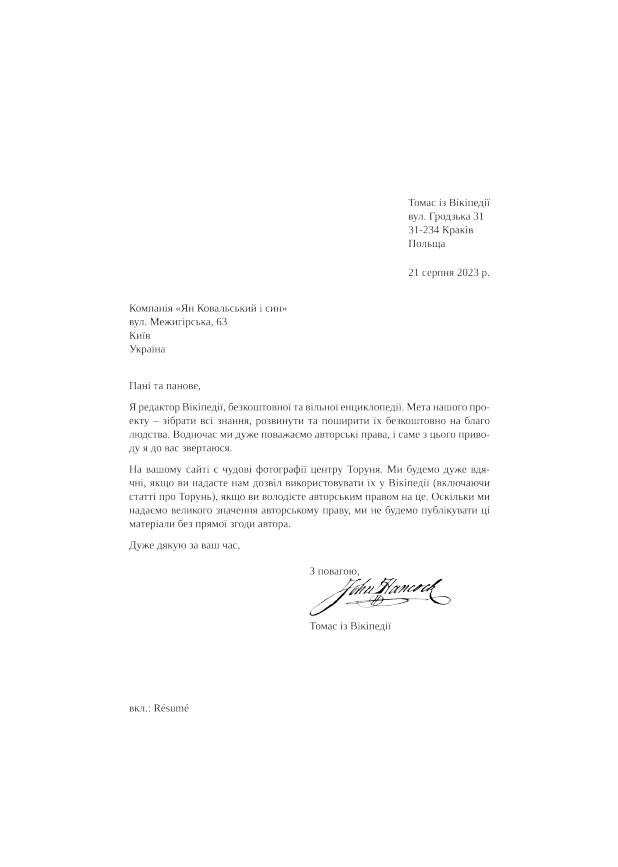

In [15]:
# plot your cover letter
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams['figure.figsize'] = (15, 11)
!inkscape --export-background-opacity=0 --export-dpi=300 --export-type=png /content/Untitled/Untitled.pdf > /dev/null 2>&1
img = mpimg.imread('/content/Untitled/Untitled.pdf.png')
imgplot = plt.imshow(img)
plt.grid(False)
plt.axis('off')
plt.show()

# Render Résumé

In [16]:
# default document with font changed to default Ubuntu font
robjects.r('''
# begin R code
path = "Untitled"
if (file.exists(path)) {unlink(path, recursive = TRUE)}
rmarkdown::draft(paste0(path, ".Rmd"), template="resume", package="resume", create_dir = TRUE, edit = FALSE)
str = readLines(paste0(path, "/", path, ".Rmd"))
str = gsub("Arial", "Liberation Serif", str)
writeLines(str, paste0(path, "/", path, ".Rmd"))
rmarkdown::render(paste0(path, "/", path, ".Rmd"))
# end R code
''')


processing file: Untitled.Rmd



1/1


/usr/bin/pandoc +RTS -K512m -RTS Untitled.knit.md --to latex --from markdown+autolink_bare_uris+tex_math_single_backslash --output Untitled.tex --lua-filter /usr/local/lib/R/site-library/rmarkdown/rmarkdown/lua/pagebreak.lua --lua-filter /usr/local/lib/R/site-library/rmarkdown/rmarkdown/lua/latex-div.lua --self-contained --template /usr/local/lib/R/site-library/resume/rmarkdown/templates/resume/resources/template.tex --highlight-style tango --pdf-engine xelatex 


Output created: Untitled.pdf



'/content/Untitled/Untitled.pdf'


In [17]:
# modify YAML as you wish and render it
path = "Untitled"
with open(path + "/" + path + ".Rmd", "w") as file:
    file.writelines(
'''
---
contact:
    name: Jacek Hammond
    degree: MSC
    street: Tampa
    city: Florida
    telephone: 555-813-4458
    email: audra.hammond@email.com

summary: >
  Sales manager with five years of experience eager to use relationship management, organizational and research skills to optimize sales strategies.

education:
  - school: University of Eastern Shore
    title: Bachelor of Arts in sales
    year: 2003
  - school: Seinäjoki College, Finland
    title: Graduate
    year: 1998
experience:
  - employer: Industry Plus Magazine
    city: Tampa, Florida
    position: Sales Manager
    period: February 2022–Current
    duties:
    - duty: Assist sales team to achieve profit goals, averaging $200,000 in annual client revenue
    - duty: Oversee development of a 15-member sales team by promoting results-driven strategies
    - duty: Develop client acquisition and lead generation strategies by conducting market research
    - duty: Project expected sales volume for existing accounts to properly allocate budget
    - duty: Analyze budget to reduce expenditure and optimize profits
  - employer: Monkey Foot Publishing
    city: Tampa, Florida
    position: Assistant Relationship
    period: July 2018–February 2022
    duties:
    - duty: Developed a territory plan and make adjustments based on analysis of competitor behavior
    - duty: Educated clients on new products and services to optimize upselling tactics
    - duty: Maintained record of customer comments, complaints and inquiries

skills:
  - skill: Relationship management
  - skill: Time management
  - skill: Consultative sales
  - skill: Communication

output:
  resume::resume:
    latex_engine: xelatex
    keep_tex: true
  font_size: 11pt
  paper_size: letterpaper
  font: Liberation Serif
---
'''
)

robjects.r('''
# begin R code
path = "Untitled"
rmarkdown::render(paste0(path, "/", path, ".Rmd"))
# end R code
''')


processing file: Untitled.Rmd



1/1


/usr/bin/pandoc +RTS -K512m -RTS Untitled.knit.md --to latex --from markdown+autolink_bare_uris+tex_math_single_backslash --output Untitled.tex --lua-filter /usr/local/lib/R/site-library/rmarkdown/rmarkdown/lua/pagebreak.lua --lua-filter /usr/local/lib/R/site-library/rmarkdown/rmarkdown/lua/latex-div.lua --self-contained --template /usr/local/lib/R/site-library/resume/rmarkdown/templates/resume/resources/template.tex --highlight-style tango --pdf-engine xelatex 


Output created: Untitled.pdf



'/content/Untitled/Untitled.pdf'


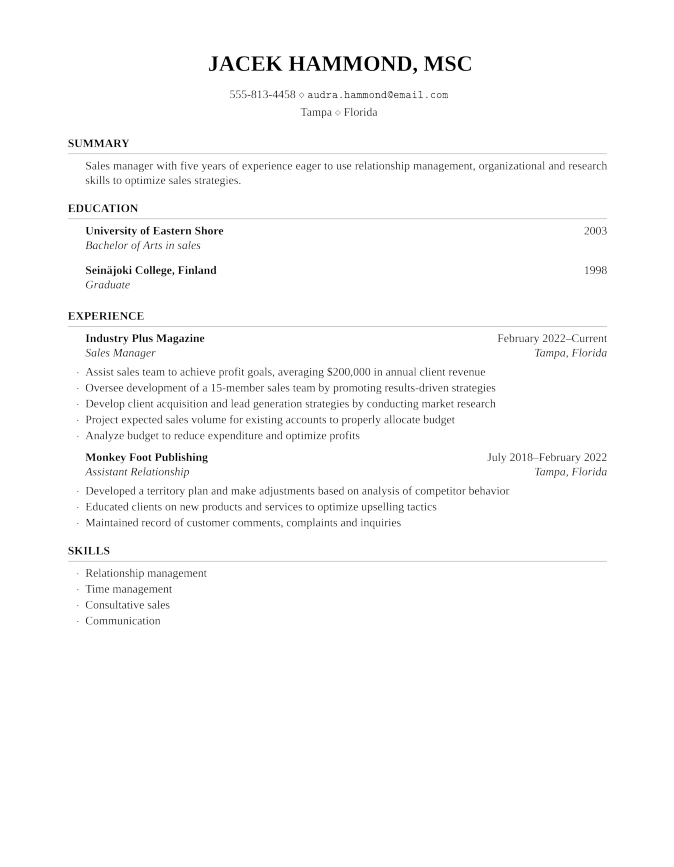

In [18]:
# plot your résumé
!inkscape --export-background-opacity=0 --export-dpi=300 --export-type=png /content/Untitled/Untitled.pdf > /dev/null 2>&1
img = mpimg.imread('/content/Untitled/Untitled.pdf.png')
imgplot = plt.imshow(img)
plt.grid(False)
plt.axis('off')
plt.show()